## Setup

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data_frame.csv")
df = df.rename(columns={
    "Unnamed: 0": "County",
    "Confirmed": "Confirmed Cases",
    "Active": "Active Cases",
    "Population Density (/mi^2)": "Population Density (persons/mi^2)",
    "Males per 100 Females": "Sex Ratio (males/100 females)"
})
df = df.drop(columns="County")
columns = list(df.columns)

## Correlation Matrix

We plot the correlation matrix to test for independence. Note some variables are not independent with each other.

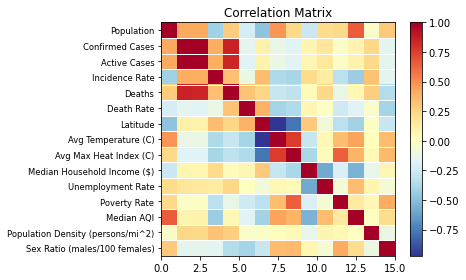

In [3]:
smg.plot_corr(np.corrcoef(df.T), ynames=columns)
plt.show()

## Q-Q Plots

We then examine the Q-Q plots. Note most variables are in some need of regularization.

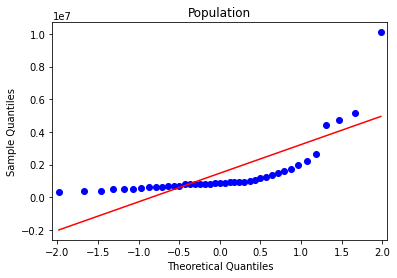

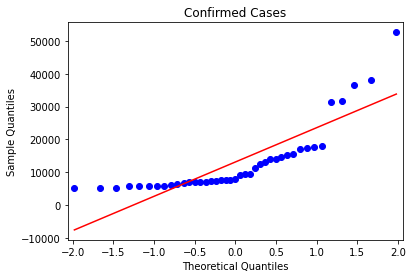

In [ ]:
for column in df.columns:
    sm.qqplot(df[column], line='s')
    plt.title(column)
    plt.show()


## Multiple Linear Regressions (Unregularized and Regularized)

In [ ]:
X = df.drop(columns=["Death Rate", "Incidence Rate"])
X = sm.add_constant(X.values)
Y1 = df["Death Rate"]
Y2 = df["Incidence Rate"]
model1 = sm.OLS(Y1, X)
model2 = sm.OLS(Y2, X)

### Death Rate (Unregularized)

In [ ]:
model1.fit().summary()

### Incidence Rate (Unregularized)

In [ ]:
model2.fit().summary()

### Death Rate (Regularized)

In [ ]:
#model1.fit_regularized(alpha=0.1, refit=True).summary()

### Incidence Rate (Regularized)

In [ ]:
#model2.fit_regularized(alpha=0.1, refit=True).summary()